In [1]:
#import autograd.numpy as np
#from autograd.scipy.integrate import odeint
#from autograd import jacobian
#from autograd.builtins import tuple
from torchdiffeq import odeint, odeint_adjoint
from torch import nn
import numpy as np
import torch as tch

#odeint(func, y0, t)
import matplotlib.pyplot as plt

#Ca0 = tch.tensor(1.0)
#k1 = k_1 = tch.tensor(3.0, dtype=t.float64)
#odeint(func, y0, t)
#tspan = tch.from_numpy(np.linspace(0, 0.5, 50))
tspan = tch.linspace(0, 0.5, 50, requires_grad=True)


def f(t,z):
    z0,z1,z2 = tch.unbind(z)
#    return tch.stack((z[0]**2 - z[1], z[1]**1, z[2]**1-z[1]) )
    return tch.stack((z0**2 - z1, z1**1, z2**1-z1) )


class Lambda(nn.Module):
    #def forward(self, t, y):
        #return torch.mm(y**3, true_A)
    def forward(self, t,z):
        return tch.sin(z)
        #z0,z1,z2 = tch.unbind(z)
        #return tch.stack((z[0]**2 - z[1], z[1]**1, z[2]**1-z[1]) )

def C(z0):
    #z0 = t.tensor(z0, dtype=t.float64, requires_grad=True )
    
    #sol = odeint(f, z0, tspan)

    return sol
z0 =[1.,2.,3.0]
z0 = tch.tensor(z0, dtype=t.float64 , requires_grad=True)
#ol = C( z0)
sol = odeint_adjoint(Lambda(), z0, tspan)
#sol = odeint(f, z0, tspan)


ModuleNotFoundError: No module named 'torchdiffeq'

In [141]:
loss = tch.sum(sol[-1])
loss.backward(tch.ones(loss.shape) )
loss.grad

In [144]:
sol.backward(tch.ones(sol.shape))
sol.grad

In [129]:
sol.grad.

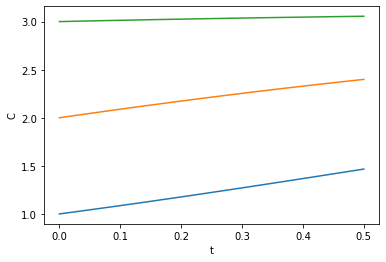

In [137]:
plt.plot(tspan.detach().numpy(), sol.detach().numpy() )
#plt.xlim([tspan.min(), tspan.max()])
plt.xlabel('t')
plt.ylabel('C');

In [92]:
#sol[-1].backward(z0)


In [93]:
L.backward(torch.ones(L.shape))

AttributeError: 'NoneType' object has no attribute 'data'

In [38]:
odeint?

Signature: odeint(func, y0, t, rtol=1e-07, atol=1e-09, method=None, options=None)
Docstring:
Integrate a system of ordinary differential equations.

Solves the initial value problem for a non-stiff system of first order ODEs:
    ```
    dy/dt = func(t, y), y(t[0]) = y0
    ```
where y is a Tensor of any shape.

Output dtypes and numerical precision are based on the dtypes of the inputs `y0`.

Args:
    func: Function that maps a Tensor holding the state `y` and a scalar Tensor
        `t` into a Tensor of state derivatives with respect to time.
    y0: N-D Tensor giving starting value of `y` at time point `t[0]`. May
        have any floating point or complex dtype.
    t: 1-D Tensor holding a sequence of time points for which to solve for
        `y`. The initial time point should be the first element of this sequence,
        and each time must be larger than the previous time. May have any floating
        point dtype. Converted to a Tensor with float64 dtype.
    rtol: optional fl

In [106]:
sol.grad_fn

In [8]:
t.tensor(5)

tensor(5)

Elapsed time = 23.8 seconds


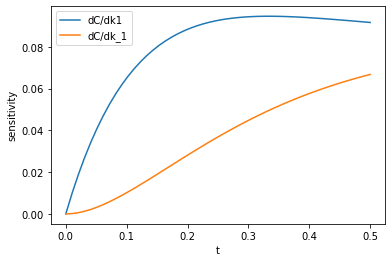

In [2]:
import time
t0 = time.time()
dCdk = jacobian(C, 0)


k_sensitivity = dCdk(np.array([k1, k_1]))

k1_sensitivity = k_sensitivity[:, 0, 0]
k_1_sensitivity = k_sensitivity[:, 0, 1]

plt.plot(tspan, np.abs(k1_sensitivity), label='dC/dk1')
plt.plot(tspan, np.abs(k_1_sensitivity), label='dC/dk_1')
plt.legend(loc='best')
plt.xlabel('t')
plt.ylabel('sensitivity')
print(f'Elapsed time = {time.time() - t0:1.1f} seconds')

In [4]:
import jax

ModuleNotFoundError: No module named 'jaxlib'

In [76]:
import torch
# Creating the graph
x = torch.tensor(1.0, requires_grad = True)
z = x ** 3
z.backward() #Computes the gradient 
print(x.grad.data) #Prints '3' which is dz/dx 

tensor(3.)


# TF
test differentiating an ODE solves using "tfdiffeq".

In [27]:
%load_ext autoreload
%autoreload 2
import tfdiffeq as td

from tfdiffeq import odeint
#from tfdiffeq import cast_double
import tensorflow as tf
tf.keras.backend.set_floatx('float64') # Presumably can get more speed, especially on a GPU, 
#if we used float32
import numpy as np
import pylab as pl
#import torch as tch

#odeint(func, y0, t)
import matplotlib.pyplot as plt

@tf.function
def f(t, z, pars): # The actual function, dz_dt
    # y now reprents the a vector of [u, v]
    #u, v = y[0], y[1]
    
    #self.val.assign_add( 1)
    return z**2*pars* tf.exp(-z/10)
    #z0,z1,z2 = z
    #z0_dt = z[0]**2 - z[1]
    #z1_dt = pars[0]*tf.abs(t-pars[1])**2*z[1]**1
    #z2_dt = z[2]**1-z[1]
    #du_dt = v
    #dv_dt = 5 * v - 6 * u
    #return tf.stack([z0_dt, z1_dt, z2_dt])

class Lambda(tf.keras.Model):
    
    def __init__(self, pars):#,f): #pars are parameters to the ode
        self.pars=pars
        #self.Nevals = tf.Variable(0)#tf.convert_to_tensor(0, dtype=tf.int64)
        #self.f = tf.function(f)
        super().__init__()
    
    @tf.function
    def call(self, t, z):
        z0,z1 = z[0], z[1]
        #self.Nevals.assign_add(1)
        #return self.f(t,z,self.pars)
        #self.val.assign_add( 1)
        pow_step  = tf.pow(z0,tf.constant(2, dtype='float64') )
        tf.print(pow_step)
        tf.print(t)
        exp_step = pow_step*tf.exp(-z0)*t
        z0_dt = self.pars* exp_step
        z1_dt = z1+z0
        return tf.stack([z0_dt, z1_dt])
        
#     def call(self, t, z): # The actual function, dz_dt
#         #return f(t,z, self.pars)
#         # y now reprents the a vector of [u, v]
#         #u, v = y[0], y[1]
#         #z0,z1,z2 = z
#         z0_dt = z[0]**2 - z[1] 
#         z1_dt = self.pars[0]*tf.abs(t-self.pars[1])**2*z[1]**1
#         z2_dt = z[2]**1-z[1]
#         #du_dt = v
#         #dv_dt = 5 * v - 6 * u
#         self.val.assign_add( 1)
#         return tf.stack([z0_dt, z1_dt, z2_dt])
    
    #return tf.stack([du_dt, dv_dt])  # vector of shape [2]


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [30]:
with tf.device("/cpu:0"):
    tspan = tf.linspace(0.0, 5.0, 400)
    z0 = np.linspace(0,2,2000).reshape(2,1000) # initial values
    z0 = tf.convert_to_tensor(z0, dtype=tf.float64)
    p0 = tf.linspace(-4, 4,1000) #parameters for the ODE
    p0 = tf.convert_to_tensor(p0, dtype=tf.float64)
    ode = Lambda(p0)
    #tspan =td.cast_double(tspan)
    #ol = C( z0)
    %time sol = odeint(ode, z0, tspan, method='rk4')
    #sol = odeint(f, z0, tspan)
    #L = tf.reduce_sum(sol[-1])

[0 1.0010007505003125e-06 4.00400300200125e-06 ... 0.99500375500406524 0.99700075150131318 0.99899975000006236]
0
[0 1.0010007505003125e-06 4.00400300200125e-06 ... 0.99500375500406524 0.99700075150131318 0.99899975000006236]
0.0041771093383431435
[0 1.0010003323719323e-06 4.0039996670230561e-06 ... 0.99515642934594417 0.99715404008263608 0.999153654209134]
0.0083542186766862869
[0 1.0010003323722815e-06 4.0039996670286059e-06 ... 0.99515645283014476 0.99715406368517856 0.99915367793030463]
0.01253132801502943
[0 1.0010001233079714e-06 4.003997999537601e-06 ... 0.995232784120062 0.99723070206959363 0.99923062410335184]
0.01253132801502943
[0 1.0009997051799842e-06 4.0039946645656514e-06 ... 0.99538549364733875 0.99738402603126641 0.99938456388836749]
0.016708437353372574
[0 1.0009988689249697e-06 4.0039879946370225e-06 ... 0.99569099482811929 0.99769075652999006 0.99969252648435558]
0.020885546691715717
[0 1.0009984507984663e-06 4.0039846596886645e-06 ... 0.99584382173197372 0.99784419

0.19632413983345032
[0 1.0008404174557566e-06 4.0027243429166483e-06 ... 1.0552987533838418 1.0575409792669013 1.0597857711991696]
0.20050124824047089
[0 1.0008402084926676e-06 4.0027226770337117e-06 ... 1.05538318881179 1.0576257647432497 1.0598709075398927]
0.20050124824047089
[0 1.0008335200593919e-06 4.0026693431354644e-06 ... 1.0579747609253178 1.0602279901331193 1.062483811115758]
0.20467835664749146
[0 1.0008264137604346e-06 4.0026126784327924e-06 ... 1.060741272811391 1.0630058895094936 1.0652731246375247]
0.20885546505451202
[0 1.0008197253875598e-06 4.0025593454946755e-06 ... 1.0633404255436374 1.0656157405718376 1.0678936991117203]
0.21303257346153259
[0 1.00081951643854e-06 4.0025576798352989e-06 ... 1.063426005136914 1.0657016762174831 1.0679799916417581]
0.21303257346153259
[0 1.0008124101993309e-06 4.0025010160824185e-06 ... 1.0662003324157865 1.0684874378381137 1.0707772144415544]
0.21720968186855316
[0 1.0008048861278985e-06 4.0024410220567325e-06 ... 1.069152525829614

[0 1.0003719727422983e-06 3.9989902374668661e-06 ... 1.2527649113863502 1.2558412652625741 1.2589222023954338]
0.39682538310686749
[0 1.000359022684899e-06 3.9988870426744959e-06 ... 1.2586685120775896 1.2617703915652663 1.2648769176528096]
0.40100249648094177
[0 1.000358814056127e-06 3.9988853821041652e-06 ... 1.2587816521084338 1.2618840270433469 1.2649910497001762]
0.40100249648094177
[0 1.0003454468428402e-06 3.998778867785564e-06 ... 1.264927290971205 1.2680562780538756 1.271189978808962]
0.40517960985501605
[0 1.000331662538435e-06 3.9986690349682879e-06 ... 1.2713206171508173 1.2744773293891147 1.2776388238834087]
0.40935672322909039
[0 1.0003182955347723e-06 3.9985625239786126e-06 ... 1.277498958355497 1.2806824811444377 1.2838708528904996]
0.41353383660316467
[0 1.000318086934686e-06 3.9985608638634283e-06 ... 1.277614680733139 1.28079871136436 1.2839875920905117]
0.41353383660316467
[0 1.0003043028713402e-06 3.9984510346149781e-06 ... 1.2840413913113458 1.2872533509750923 1.2

0.5931495030721029
[0 9.9957708013780824e-07 3.9926598749342196e-06 ... 1.6685610920749312 1.673487773206515 1.6784236055040731]
0.59732661644617713
[0 9.9955746934015648e-07 3.992503785795607e-06 ... 1.6801362531640065 1.6851155157059605 1.69010405707141]
0.60150372982025146
[0 9.9955726127946561e-07 3.9925021342285708e-06 ... 1.6803018126329405 1.6852817846576782 1.6902710363893745]
0.60150372982025146
[0 9.9953723457962622e-07 3.992342745431301e-06 ... 1.6922513926718559 1.6972856235429583 1.7023292643845207]
0.6056808431943258
[0 9.9951679207487247e-07 3.9921800585146936e-06 ... 1.7045839059961891 1.7096740964139563 1.7147738294791952]
0.6098579565684
[0 9.9949676582248756e-07 3.9920206768114983e-06 ... 1.7166224781826478 1.7217674573914328 1.7269221112120017]
0.61403506994247437
[0 9.9949655780501146e-07 3.9920190259284649e-06 ... 1.7167919714331341 1.7219376718628843 1.7270930477108213]
0.61403506994247437
[0 9.9947611574567676e-07 3.9918563460738338e-06 ... 1.7292152613229881 1.

0.793650766213735
[0 9.98463154642992e-07 3.9838013886446542e-06 ... 2.4435152049642439 2.4519648670067822 2.4604310632460491]
0.79782787958780921
[0 9.98436911436267e-07 3.9835928533997738e-06 ... 2.4645043806474489 2.4730488293917938 2.4816099795557287]
0.80200499296188354
[0 9.9843670417521342e-07 3.9835912144688945e-06 ... 2.464731427247278 2.4732766109341719 2.4818384940037683]
0.80200499296188354
[0 9.984100468269812e-07 3.983379407383159e-06 ... 2.4862682642358678 2.4949102056080061 2.5035690103596488]
0.80618210633595788
[0 9.9838297546671813e-07 3.9831643304981878e-06 ... 2.5083589494198417 2.5170995781302707 2.5258572303022948]
0.81035921971003211
[0 9.98356318891472e-07 3.9829525356395862e-06 ... 2.5300866715521093 2.5389250740108418 2.547780665578244]
0.81453633308410645
[0 9.9835611168803256e-07 3.9829508976174844e-06 ... 2.5303167425772473 2.5391558635311595 2.5480121712492103]
0.81453633308410645
[0 9.9832904109803986e-07 3.9827358329169923e-06 ... 2.5526020605806092 2.5

0.99415202935536706
[0 9.9703179763534987e-07 3.9724400648603432e-06 ... 3.7774792911855055 3.7916132470935522 3.8057692197334076]
0.99832914272944129
[0 9.9699895981919635e-07 3.9721796793599911e-06 ... 3.8121730073333491 3.8264463670583662 3.8407417767790748]
1.0025062561035156
[0 9.9699875358693324e-07 3.9721780566228791e-06 ... 3.8124108647857322 3.8266843273349873 3.8409798328314553]
1.0025062561035156
[0 9.9696550404966425e-07 3.971914436133873e-06 ... 3.8477400731853511 3.8621537982576606 3.8765895846983014]
1.006683349609375
[0 9.9693184279832668e-07 3.9716475819645358e-06 ... 3.88369813697833 3.8982528458345613 3.9128296193032752]
1.0108604431152344
[0 9.96898594446029e-07 3.9713839801647595e-06 ... 3.9193511549294655 3.9340474350890289 3.9487657966663772]
1.0150375366210938
[0 9.9689838828756834e-07 3.9713823585712275e-06 ... 3.9195861839551993 3.9342825039991784 3.94900089821957]
1.0150375366210938
[0 9.96864727897612e-07 3.9711155204998777e-06 ... 3.9558736147268272 3.97071

1.1946532726287842
[0 9.9528506228373427e-07 3.9586081854573351e-06 ... 5.8234689394826011 5.8448172764010806 5.866181449971589]
1.1988303661346436
[0 9.9524567719217336e-07 3.958296690879694e-06 ... 5.8735938245129047 5.8950984176899048 5.91661856333737]
1.2030074596405029
[0 9.952454722167227e-07 3.9582950878133578e-06 ... 5.8737308488513253 5.8952345017038406 5.9167537013004621]
1.2030074596405029
[0 9.9520567762809628e-07 3.9579803971930591e-06 ... 5.9243425834557337 5.9460011379927655 5.967674940937667]
1.2071845928827922
[0 9.9516547410576448e-07 3.9576625164688219e-06 ... 5.9754202355985448 5.9972322336485071 6.0190591685547412]
1.2113617261250813
[0 9.9512568119903463e-07 3.9573478522811893e-06 ... 6.0264587604854745 6.0484266952276524 6.0704092630254038]
1.2155388593673706
[0 9.951254763055378e-07 3.9573462505252376e-06 ... 6.0265861808199093 6.0485531214752122 6.0705346898381105]
1.2155388593673706
[0 9.9508527484348786e-07 3.9570283991945649e-06 ... 6.07809345013214 6.100214

[0 9.9322544544429647e-07 3.9423448127817164e-06 ... 8.5483291725831645 8.57670727162534 8.6050813812492954]
1.3993316491444905
[0 9.93179568830506e-07 3.9419830833707906e-06 ... 8.6110284884066388 8.6395419483405451 8.6680509183652532]
1.4035087823867798
[0 9.9317936532835876e-07 3.9419815032760362e-06 ... 8.6109975557126415 8.6395096168993426 8.6680171895357851]
1.4035087823867798
[0 9.9313308327163829e-07 3.9416166346948276e-06 ... 8.6738601162868427 8.70250496987537 8.731144834437135]
1.4076858758926392
[0 9.93086395562741e-07 3.9412486269945019e-06 ... 8.7368667218354048 8.76564182200136 8.7944114335006471]
1.4118629693984985
[0 9.9304011576779449e-07 3.9408837938113557e-06 ... 8.8001804542896132 8.82908879035701 8.8579911319095554]
1.4160400629043579
[0 9.93039912369129e-07 3.9408822152924273e-06 ... 8.8001392498783755 8.82904618696556 8.8579471312847122]
1.4160400629043579
[0 9.92993226917318e-07 3.9405142429180469e-06 ... 8.86359582220107 8.892633409662734 8.9216644993541152]
1

[0 9.9085588295030062e-07 3.9236955716004044e-06 ... 11.741552176232981 11.77546545050463 11.809350526982691]
1.5998328924179077
[0 9.9080358104636645e-07 3.9232846268782081e-06 ... 11.811498330392944 11.845509918100403 11.87949281872217]
1.6040099859237671
[0 9.908033792432077e-07 3.9232830730277252e-06 ... 11.811329896208319 11.845340335091917 11.879322091960159]
1.6040099859237671
[0 9.9075067518315458e-07 3.9228690431964521e-06 ... 11.881145229934379 11.915251685783996 11.949328979009284]
1.6081870794296265
[0 9.9069756922032033e-07 3.9224519321541124e-06 ... 11.950819902167858 11.985020152530256 12.019190768397623]
1.6123641729354858
[0 9.9064486808278329e-07 3.9220379478435114e-06 ... 12.02104562681072 12.055341886037455 12.089608027319917]
1.6165412664413452
[0 9.9064466639269349e-07 3.9220363957347222e-06 ... 12.020870835968777 12.055165973103618 12.089430997427936]
1.6165412664413452
[0 9.90591562841903e-07 3.9216193261646749e-06 ... 12.09095183142095 12.125340725405849 12.159

KeyboardInterrupt: 

In [31]:
tspan = tf.linspace(0.0, 5.0, 400)
z0 = np.linspace(0,2,2000).reshape(2,1000) # initial values
z0 = tf.convert_to_tensor(z0, dtype=tf.float64)
p0 = tf.linspace(-4, 4,1000) #parameters for the ODE
p0 = tf.convert_to_tensor(p0, dtype=tf.float64)
ode = Lambda(p0)
#tspan =td.cast_double(tspan)
#ol = C( z0)
def run(z0, tspan):
    sol = odeint(ode, z0, tspan, method='rk4')
    return sol
run2=tf.function(run)

In [33]:
tf.function(ode)(0.0, z0)


If you intended to run this layer in float64, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float32 by default, call `tf.keras.backend.set_floatx('float32')`. To change just this layer, pass dtype='float32' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

[0 1.0010007505003125e-06 4.00400300200125e-06 ... 0.99500375500406524 0.99700075150131318 0.99899975000006236]
0


<tf.Tensor: shape=(2, 1000), dtype=float64, numpy=
array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [1.00050025, 1.00250125, 1.00450225, ..., 2.99549775, 2.99749875,
        2.99949975]])>

In [35]:
run2(z0, tspan)

OperatorNotAllowedInGraphError: in user code:

    <ipython-input-31-fe7823acb44b>:10 run  *
        sol = odeint(ode, z0, tspan, method='rk4')
    /home/morgan/sd_base/home_dir/git/tfdiffeq/tfdiffeq/odeint.py:79 odeint  *
        solution = solver.integrate(t)
    /home/morgan/sd_base/home_dir/git/tfdiffeq/tfdiffeq/solvers.py:95 integrate  *
        for t0, t1 in zip(time_grid[:-1], time_grid[1:]):
    /home/morgan/anaconda3/envs/spylind/lib/python3.8/site-packages/tensorflow/python/autograph/operators/py_builtins.py:402 zip_  **
        return _py_zip(*iterables)
    /home/morgan/anaconda3/envs/spylind/lib/python3.8/site-packages/tensorflow/python/autograph/operators/py_builtins.py:410 _py_zip
        return zip(*iterables)
    /home/morgan/anaconda3/envs/spylind/lib/python3.8/site-packages/tensorflow/python/framework/ops.py:503 __iter__
        self._disallow_iteration()
    /home/morgan/anaconda3/envs/spylind/lib/python3.8/site-packages/tensorflow/python/framework/ops.py:496 _disallow_iteration
        self._disallow_when_autograph_enabled("iterating over `tf.Tensor`")
    /home/morgan/anaconda3/envs/spylind/lib/python3.8/site-packages/tensorflow/python/framework/ops.py:472 _disallow_when_autograph_enabled
        raise errors.OperatorNotAllowedInGraphError(

    OperatorNotAllowedInGraphError: iterating over `tf.Tensor` is not allowed: AutoGraph did convert this function. This might indicate you are trying to use an unsupported feature.


In [3]:

    
with tf.device("/cpu:0"):
    with tf.GradientTape() as g:
        g.watch(p0)
        ode = Lambda(p0)

        #g.watch(z0)
        
        #tspan = tf.linspace(0.0, 2, 1000)
        #tspan =td.cast_double(tspan)
        #ol = C( z0)
        %time sol = odeint(ode, z0, tspan, method='adams')
        #sol = odeint(f, z0, tspan)
        L = tf.reduce_sum(sol[-1])


TypeError: __init__() missing 1 required positional argument: 'f'

In [ ]:
ode.val

In [79]:
L

<tf.Tensor: shape=(), dtype=float64, numpy=37932.76585269482>

In [82]:
%time dsol_dz = g.gradient(L, p0)

CPU times: user 2.67 s, sys: 64.8 ms, total: 2.73 s
Wall time: 2.51 s


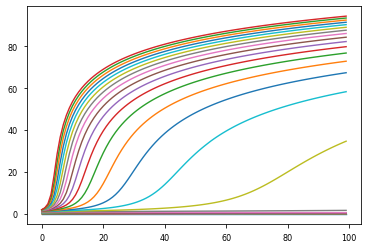

In [80]:
pl.plot(sol[:,::30])

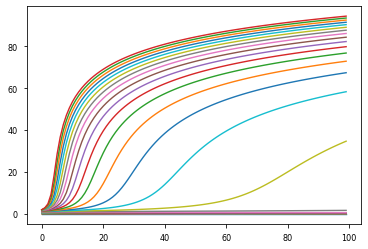

In [76]:
pl.plot(sol[:,::30])

In [69]:
#pl.plot(sol)

In [83]:
dsol_dz

<tf.Tensor: shape=(1000,), dtype=float64, numpy=
array([ 0.00000000e+00,  7.34075084e+03,  8.58407524e+04,  3.30432847e+05,
        8.18119238e+05,  1.60137469e+06,  2.71170689e+06,  4.16399596e+06,
        5.95996869e+06,  8.09075296e+06,  1.05387291e+07,  1.32788861e+07,
        1.62798363e+07,  1.95045950e+07,  2.29111975e+07,  2.64532001e+07,
        3.00801001e+07,  3.37376967e+07,  3.73684074e+07,  4.09115525e+07,
        4.43036147e+07,  4.74784791e+07,  5.03676588e+07,  5.29005076e+07,
        5.50044235e+07,  5.66050436e+07,  5.76264322e+07,  5.79912625e+07,
        5.76209939e+07,  5.64360431e+07,  5.43559521e+07,  5.12995517e+07,
        4.71851212e+07,  4.19305447e+07,  3.54534637e+07,  2.76714270e+07,
        1.85020363e+07,  7.86309018e+06, -4.32727653e+06, -1.81504553e+07,
       -3.36872300e+07, -5.10176461e+07, -7.02208823e+07, -9.13751251e+07,
       -1.14557448e+08, -1.39843691e+08, -1.67308346e+08, -1.97024440e+08,
       -2.29063429e+08, -2.63495089e+08, -3.0038741

In [17]:
sol[-1]

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([0.21025278, 2.09066148, 3.77962996])>

In [4]:
x = tf.constant(3.0)
with tf.GradientTape() as g:
  g.watch(x)
  y = x * x
dy_dx = g.gradient(y, x) # Will compute to 6.0

In [5]:
sol

<tf.Tensor: shape=(10, 3), dtype=float64, numpy=
array([[1.        , 2.        , 3.1       ],
       [0.94080566, 2.01698345, 3.1623503 ],
       [0.87416031, 2.03199163, 3.22734861],
       [0.79990744, 2.04511868, 3.29525646],
       [0.71805308, 2.05646788, 3.36634463],
       [0.62880523, 2.06615045, 3.44089327],
       [0.53259905, 2.07428458, 3.51919197],
       [0.43011572, 2.0809944 , 3.60153989],
       [0.32228107, 2.08640896, 3.68824615],
       [0.21025278, 2.09066148, 3.77962996]])>

In [135]:
@tf.function
def f(a):
    return tf.constant(1j)*a

def tf_realify(tf_func):
    tf.print(tf_func.function_spec.input_signature)
    @tf.function
    def f_wrapped(a,b):
        return tf_func(tf.cast(a, tf.complex128)+1j*tf.cast(b, tf.complex128) )
    return f_wrapped

f2=tf_realify(f)
f2(3,1)

None


<tf.Tensor: shape=(), dtype=complex128, numpy=(-1+3j)>

In [143]:
a, b = tf.constant(3, dtype=tf.float64), tf.constant(1, dtype=tf.float64)
%timeit f2(a,b)

The slowest run took 4.76 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 146 µs per loop


In [145]:
c = tf.constant(1+1j, dtype=tf.complex128)
%timeit f(c)

The slowest run took 4.39 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 134 µs per loop


In [121]:
tf.constant(1j)

<tf.Tensor: shape=(), dtype=complex128, numpy=1j>

In [108]:
cf=f.get_concrete_function(0.5,z0, p0)

In [110]:
cf.

[<tf.Tensor 'z:0' shape=(1000,) dtype=float64>,
 <tf.Tensor 'pars:0' shape=(1000,) dtype=float64>]

In [112]:
f.function_spec.input_signature

In [113]:
cf.structured_input_signature

((0.5,
  TensorSpec(shape=(1000,), dtype=tf.float64, name='z'),
  TensorSpec(shape=(1000,), dtype=tf.float64, name='pars')),
 {})

In [148]:
@tf.function
def f1(a,b,c):
    return a+b+c
@tf.function
def f2(a,b,c):
    return a+b
@tf.function
def f3(a,b,c):
    return a

fL = [f1,f2,f3]

In [165]:
def get_wrapped(fL):
    @tf.function(experimental_compile=True)
    def f_c(p):
        return tf.stack([f(a,b,c) for f in fL])
    return f_c

f_c = get_wrapped(fL)
f_c(1.5,2.5,3.5)

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([7.5, 4. , 1.5], dtype=float32)>

In [167]:
%timeit f_c(1.5,2.5,3.5)

The slowest run took 6.29 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 159 µs per loop


In [18]:
@tf.function
def f(a,b,c):
    return (a+b+c)

@tf.function
def tf_unpack(vals):
    #for k in range(100):
    #    f(*tf.unstack(vals))
    return f(*tf.unstack(vals))
   

In [19]:
vals = tf.convert_to_tensor(np.arange(3)*0.5)


The slowest run took 477.05 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 139 µs per loop


In [23]:
%timeit tf_unpack(vals)

The slowest run took 6.06 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 138 µs per loop


In [24]:
fp = lambda vals:tf.math.real(tf_unpack(vals)) 
fp = tf.function(fp)

In [26]:
%timeit fp(vals)

The slowest run took 8.05 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 138 µs per loop


In [7]:
T=tf.convert_to_tensor(1 + 0.5j)

In [8]:
tf.math.real(T)

<tf.Tensor: shape=(), dtype=float64, numpy=1.0>

# Testing pyIVP and tensorflow

In [2]:
%load_ext autoreload
%autoreload 2
import tensorflow as tf
import sympy as sm
from spylind import spyIVP as so
from pylab import *
xS, yS, vxS, vyS = sm.symbols("x, y, v_x, v_y", real=True)
g= -10.0
dy_dtD = {xS:vxS, 
       yS:vyS,
       vxS:0,
       vyS:g }
ode_s = so.ODESolver(dy_dtD,  dims={}, backend='tensorflow', default_dtype=np.float64)
ode_s.set_initial_conditions({xS:0,yS:0,vxS:10,vyS:10}) 
ode_s.setup()
tSteps = np.linspace(0,1,10000)
%time arr =ode_s.integrate(tSteps, 1.0)

sm.ode
plot(tSteps, arr.real)
xlabel('t')
legend(dy_dtD.keys())

Munch({'tSym': t, 'dimSyms': [], 'prop_state_syms': [x, y, v_x, v_y], 'stationary_state_syms': [], 'driving_syms': [], 'state_dep_syms': []})
state dependent functions should have signature [t, x, y, v_x, v_y]
CPU times: user 5.8 s, sys: 102 ms, total: 5.9 s
Wall time: 7.15 s


AttributeError: 'tensorflow.python.framework.ops.EagerTensor' object has no attribute 'real'

In [4]:
import tensorflow as tf
xS, yS, vxS, vyS = sm.symbols("x, y, v_x, v_y", real=True)
zS = sm.symbols("z", real=True)
g= tf.constant(-10.0, dtype='float64')
dy_dtD = {xS:vxS, 
       yS:vyS ,
       vxS:0 +zS,
       vyS: g  }

ode_s = so.ODESolver(dy_dtD,  dims={zS:linspace(-2,2,10000)}, backend='numpy', default_dtype='float64')
ode_s.set_initial_conditions({xS:0,yS:0,vxS:10,vyS:10}) 
ode_s.setup(bForceStateDimensions=True)
tSteps = linspace(0,200,4)
%time arr =ode_s.integrate(tSteps, 1.0)
if 0:
    plot(tSteps, arr[:,:,0].real)
    xlabel('t')
    legend(dy_dtD.keys())
    figure()
    plot(tSteps, arr[:,:,-1].real)
    xlabel('t')
    legend(dy_dtD.keys())
    figure()
    imshow(arr[:,1,:].real, aspect='auto')

Munch({'tSym': t, 'dimSyms': [z], 'prop_state_syms': [x, y, v_x, v_y], 'stationary_state_syms': [], 'driving_syms': [], 'state_dep_syms': [z]})
state dependent functions should have signature [t, z, x, y, v_x, v_y]
Not integrating first step (it's just the initial state)
CPU times: user 242 ms, sys: 149 ms, total: 391 ms
Wall time: 259 ms


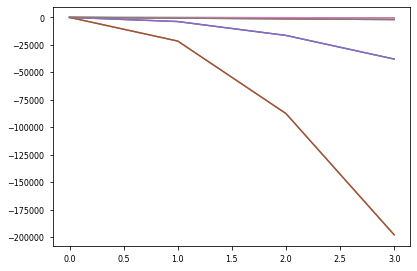

In [5]:
plot(arr[:,:,5])
plot(arr[:,:,9])

In [6]:
xRef =tf.linspace(0,1,1000)
yRef = tf.sin(5*pi*xRef)

In [7]:
def tf_interpolator(xOrig, yOrig):
    xOrig = tf.convert_to_tensor(xOrig, dtype=tf.float64)
    yOrig = tf.convert_to_tensor(yOrig, dtype=tf.float64)
    N = xOrig.shape[0]
    dx = xOrig[1]-xOrig[0]
    x0 = xOrig[0]
    xMax = xOrig[-1]
    zero = tf.constant(0, dtype=tf.float64)
    #@tf.function(experimental_compile=True)
    def f(x):
        #pdb.set_trace()
        #ind = tf.math.floormod((x-x0), dx)
        
        if x>=xMax or x<x0:
            return zero#tf.constant(0., dtype=tf.float64);
        else:
            ind = tf.math.floordiv(x-x0, dx)
            remainder = x- ind*dx
            ind=tf.cast(ind, tf.int64)

            return (1.-remainder)*yOrig[ind] + remainder*yOrig[ind+1]
    return f

intpF = tf.function(tf_interpolator(xRef, yRef))
f = tf.function(intpF, experimental_compile=True)

In [8]:
xOut =linspace(-0.01, 1.01, 1000)
yOut = np.array([intpF(val) for val in xOut])
    

In [9]:
#randL =np.random.normal(size=10000)
f = tf.function(lambda x: x**2)
f = intpF
randL = tf.random.uniform(minval=0.01, maxval=0.9, shape=(10000,), dtype=tf.float64 )
randL2 = tf.random.uniform(minval=0.01, maxval=0.9, shape=(10000,), dtype=tf.float64 )
randL3 = tf.random.uniform(minval=0.01, maxval=0.9, shape=(10000,), dtype=tf.float64 )


def test(randL):
    for val in randL:
        a = f(val)
t= tf.function(test, experimental_compile=True)


In [182]:
%timeit intpF(tf.random.uniform(minval=-0.01, maxval=1.01, dtype=tf.float64, shape=[]))

426 µs ± 49.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [ ]:
tf.timeit tf.random.unifi

In [100]:
#%time t(randL3)
%time t(randL)

InvalidArgumentError: Argument 0 to function '__inference_f_1488041' must be a compile-time constant, but unable to resolve argument value to a constant.
	 [[{{node while}}]] [Op:__inference_test_1488155]

In [118]:
%time t(randL)
%time t(randL2)
%time t(randL3)

CPU times: user 0 ns, sys: 1e+03 µs, total: 1e+03 µs
Wall time: 671 µs
CPU times: user 1e+03 µs, sys: 0 ns, total: 1e+03 µs
Wall time: 1.49 ms
CPU times: user 1 ms, sys: 0 ns, total: 1 ms
Wall time: 609 µs


In [6]:
%timeit intpF(tf.constant(0.5, dtype='float64'))

230 µs ± 50.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [ ]:
%timeit f(c)

In [67]:

#f = tf.function(intpF, experimental_compile=True)
f = intpF
def test(randL):
    return tf.map_fn(f, randL)
t= tf.function(test, experimental_compile=True)
out = t(randL)
%time out=t(randL2)
%time out=t(randL3)

CPU times: user 40 ms, sys: 1 ms, total: 41 ms
Wall time: 41.2 ms
CPU times: user 42 ms, sys: 0 ns, total: 42 ms
Wall time: 41.3 ms


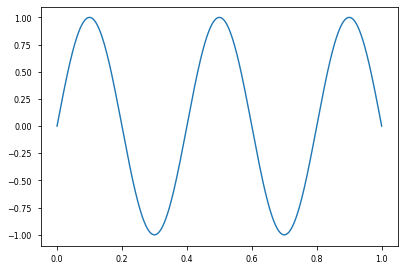

In [70]:
plot(xRef, yRef)

# Autograd and interpolating

In [1]:
%load_ext autoreload
%autoreload 2
import tensorflow as tf
import sympy as sm
from spylind import spyIVP as so
from pylab import *
import time
from spylind.tf_misc import tf_interpolator2
if 0:
    def tf_interpolator(xOrig, yOrig):
        xOrig = tf.constant(tf.convert_to_tensor(xOrig, dtype=tf.float64))
        yOrig = tf.constant(tf.convert_to_tensor(yOrig, dtype=tf.float64))

        N = xOrig.shape[0]
        dx = xOrig[1]-xOrig[0]
        x0 = xOrig[0]
        xMax = xOrig[-1]
        zero = tf.constant(0, dtype=tf.float64)
        #@tf.function(experimental_compile=True)
        def f(x):
            #pdb.set_trace()
            #ind = tf.math.floormod((x-x0), dx)

            if x>=xMax or x<x0:
                return zero#tf.constant(0., dtype=tf.float64);
            else:
                ind_f = tf.math.floordiv(x-x0, dx)
                remainder = (x/dx- ind_f)
                ind=tf.cast(ind_f, tf.int64)
                #tf.print(remainder)
                return (1.-remainder)*yOrig[ind] + remainder*yOrig[ind+1]
        return f
    def tf_interpolator2(xOrig, yOrig):
        xOrig = tf.constant(tf.convert_to_tensor(xOrig, dtype=tf.float64))
        #yOrig = tf.constant(tf.convert_to_tensor(yOrig, dtype=tf.float64))

        N = xOrig.shape[0]
        dx = xOrig[1]-xOrig[0]
        x0 = xOrig[0]
        xMax = xOrig[-1]
        zero = tf.constant(0, dtype=tf.float64)
        mask = tf.concat([tf.constant([0.5,0.5], dtype='float64'), tf.zeros(xOrig.shape[0]-2, dtype='float64') ], axis=0)
        def f(x):
            #pdb.set_trace()
            #ind = tf.math.floormod((x-x0), dx)

            if x>=xMax or x<x0:
                return zero#tf.constant(0., dtype=tf.float64);
            else:
                ind = tf.math.floordiv(x-x0, dx)
                remainder = x- ind*dx
                ind=tf.cast(ind, tf.int64)
                res = tf.roll(mask, ind, axis=0)*yOrig
                return tf.reduce_sum(res)
        return f



In [2]:


xS, yS, vxS, vyS = sm.symbols("x, y, v_x, v_y", real=True)
drvS = sm.symbols("D", real=True)

zS = sm.symbols("z", real=True)
#g= tf.constant(-10.0, dtype='float64')
g = -10.
dy_dtD = {xS:vxS, 
       yS:vyS ,
       vxS:0 +0*zS,
       vyS: g + drvS  }

@tf.function(experimental_compile=True)
def f_driving(t):
    return 30*tf.sin(2*pi*t)


tDrv = linspace(0,2,100)
yDrv0 = 0*tf.sin(2*pi*tDrv) + 10
#yDrv0 = tf.convert_to_tensor(yN.repeat(4), dtype='float64')
ode_s = so.ODESolver(dy_dtD,  dims={zS:linspace(-2,2,10)}, backend='tensorflow', default_dtype='float64')
ode_s.set_initial_conditions({xS:0,yS:0,vxS:10,vyS:10}) 

def calc_g(yDrv):
    yDrv =tf.convert_to_tensor(yDrv, dtype='float64')
    f_driving = tf.function(tf_interpolator2(tDrv, yDrv), experimental_compile=False)

    ode_s.set_driving({drvS:f_driving})
    ode_s.setup(bForceStateDimensions=True)
    tSteps = linspace(0,1.8,20)

    with tf.device("/cpu:0"):
        with tf.GradientTape(watch_accessed_variables=False) as g:
            #g.watch(p0)
            g.watch(yDrv)
            #arr =ode_s.integrate(tSteps, 1.0)
            tStart = time.time()
            arr = ode_s.integrate(tDrv,1.0, method='rk4', solver_options=dict(step_size = (tDrv[1]-tDrv[0])/2 ) ) 
            print("time taken: ", tStart-time.time())
            #print(arr.shape)
            #L=tf.pow(tf.reduce_mean(arr[-1,1]), 2)
            L=tf.reduce_mean(tf.pow(arr[-30:,1],2))
            #L = arr[-8:,1, 1]**2
            #L = arr[-5:,1]

    print(L.numpy())
    grad = g.gradient(L, yDrv)
    return arr[:,1],grad, L

Munch({'tSym': t, 'dimSyms': [z], 'prop_state_syms': [x, y, v_x, v_y], 'stationary_state_syms': [], 'driving_syms': [], 'state_dep_syms': [D]})
state dependent functions should have signature [t, z, x, y, v_x, v_y]


In [3]:
from scipy import optimize
def f(yDrv):
    y, grad, L =calc_g(yDrv)
    return L.numpy().squeeze(), grad.numpy()
res=optimize.minimize(f, yDrv0, jac=True)
 

Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.while_loop(c, b, vars, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.while_loop(c, b, vars))
num function evaluations: 90
time taken:  -2.6226775646209717
294.76186990018005


AttributeError: 'NoneType' object has no attribute 'numpy'

In [75]:
y,grad,L= calc_g(res.x)

Nevals: <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=792>
time taken:  -1.4418601989746094
3.0830106257856106e-06


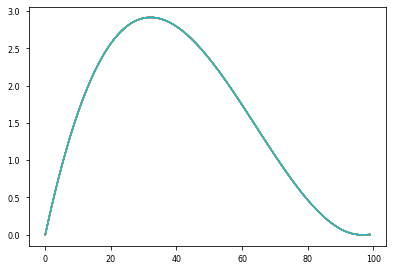

In [76]:
plot(y)

Nevals: <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=152>
time taken:  -0.5739936828613281
322.4376731301938


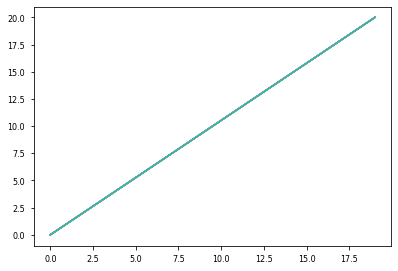

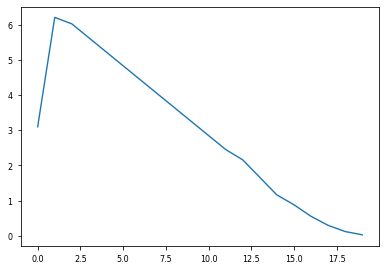

In [36]:
grad, yVals =calc_g(1*yDrv0)
plot(yVals)
figure()
plot(grad)

In [49]:
#yDrv = tf.identity(yDrv0)
yDrvL = []
gradL = []
yValsL = []
for k in range(30):
    grad, yVals =calc_g(yDrv)
    yDrv = yDrv - 4*grad
    yDrvL.append(yDrv)
    gradL.append(grad)
    yValsL.append(yVals)

Nevals: <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=152>
time taken:  -0.6864047050476074
0.4774245330185216
Nevals: <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=152>
time taken:  -0.6651170253753662
0.4710911934104487
Nevals: <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=152>
time taken:  -0.5408155918121338
0.46484233992072505
Nevals: <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=152>
time taken:  -0.5213944911956787
0.4586768453824449
Nevals: <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=152>
time taken:  -0.5175118446350098
0.45259359766677526
Nevals: <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=152>
time taken:  -0.5104200839996338
0.44659149948232646
Nevals: <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=152>
time taken:  -0.5033252239227295
0.4406694681771968
Nevals: <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=152>
time taken:  -0.4954051971435547
0.4348264355436618
Nevals: <tf.Variable 'Variable:0' shape=() dt

KeyboardInterrupt: 

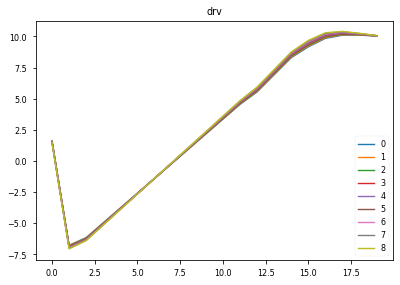

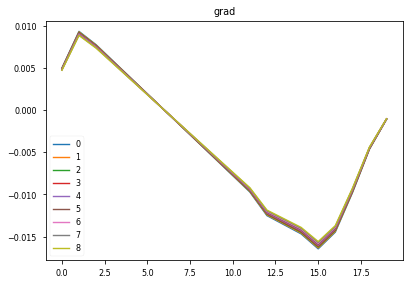

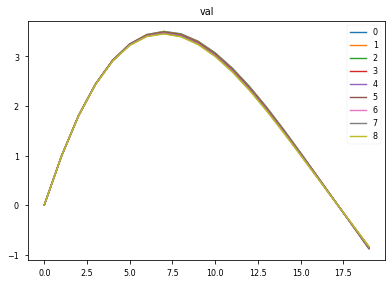

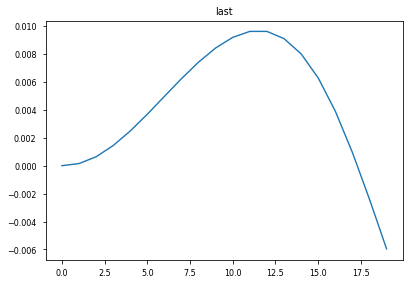

In [51]:
#plot(yDrv0)
slc = slice(0,30)
for y in yDrvL[slc]:
    plot(y)
legend(arange(10))
title('drv')
figure()
for y in gradL[slc]:
    plot(y)
legend(arange(10))
title('grad')
if 1:
    figure()
    for y in yValsL[slc]:
        plot(tf.reduce_mean(y, axis=-1))
    legend(arange(10))
    title('val')
    k =-1
    figure()
    plot(tf.reduce_mean(yValsL[-2], axis=-1)-tf.reduce_mean(yValsL[-1], axis=-1))
    title('last')

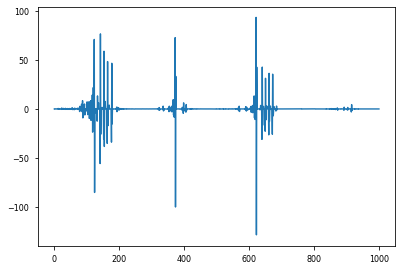

In [45]:
plot(grad)

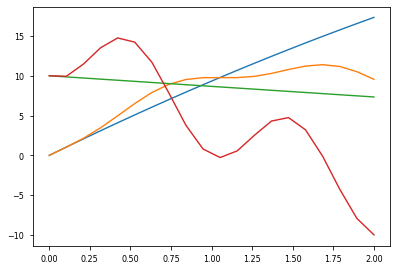

In [34]:
plot(tSteps, arr[:,:,50])

In [9]:
tf.constant(tf.linspace(0,1,1000))

<tf.Tensor: shape=(1000,), dtype=float64, numpy=
array([0.        , 0.001001  , 0.002002  , 0.003003  , 0.004004  ,
       0.00500501, 0.00600601, 0.00700701, 0.00800801, 0.00900901,
       0.01001001, 0.01101101, 0.01201201, 0.01301301, 0.01401401,
       0.01501502, 0.01601602, 0.01701702, 0.01801802, 0.01901902,
       0.02002002, 0.02102102, 0.02202202, 0.02302302, 0.02402402,
       0.02502503, 0.02602603, 0.02702703, 0.02802803, 0.02902903,
       0.03003003, 0.03103103, 0.03203203, 0.03303303, 0.03403403,
       0.03503504, 0.03603604, 0.03703704, 0.03803804, 0.03903904,
       0.04004004, 0.04104104, 0.04204204, 0.04304304, 0.04404404,
       0.04504505, 0.04604605, 0.04704705, 0.04804805, 0.04904905,
       0.05005005, 0.05105105, 0.05205205, 0.05305305, 0.05405405,
       0.05505506, 0.05605606, 0.05705706, 0.05805806, 0.05905906,
       0.06006006, 0.06106106, 0.06206206, 0.06306306, 0.06406406,
       0.06506507, 0.06606607, 0.06706707, 0.06806807, 0.06906907,
       0.0700

In [ ]:
tf.math.interp_regular_1d_grid(
    x, x_ref_min, x_ref_max, y_ref, axis=-1, fill_value='constant_extension',
    fill_value_below=None, fill_value_above=None, grid_regularizing_transform=None,
    name=None
)

In [19]:
mask=tf.concat([tf.constant([1,1], dtype='float64'), tf.zeros(98, dtype='float64') ], axis=0)

In [26]:
tf.reduce_sum(mask)

<tf.Tensor: shape=(), dtype=float64, numpy=2.0>

# Scratch test

In [9]:


from tfdiffeq import odeint
#from tfdiffeq import cast_double
import tensorflow as tf
tf.keras.backend.set_floatx('float64') # Presumably can get more speed, especially on a GPU, 
#if we used float32
import numpy as np
from matplotlib.pyplot import *
#odeint(func, y0, t)
import matplotlib.pyplot as plt
tf.ceil=tf.math.ceil


#def interpolator(xRef, yRef):
    
def tf_interpolator3(xOrig, yOrig):
    #xOrig = tf.constant(tf.convert_to_tensor(xOrig, dtype=tf.float64))
    #yOrig = tf.constant(tf.convert_to_tensor(yOrig, dtype=tf.float64))
    
    N = xOrig.shape[0]
    dx = xOrig[1]-xOrig[0]
    x0 = xOrig[0]
    xMax = xOrig[-1]
    zero = tf.constant(0, dtype=tf.float64)
    #@tf.function(experimental_compile=True)
    def f(x):
        #pdb.set_trace()
        #ind = tf.math.floormod((x-x0), dx)
        
        if x>=xMax or x<x0:
            return zero#tf.constant(0., dtype=tf.float64);
        else:
            ind_f = tf.math.floordiv(x-x0, dx)
            remainder = (x/dx- ind_f)
            ind=tf.cast(ind_f, tf.int64)
            w0 = (1.-remainder)
            w1 = remainder
            res=tf.reduce_sum(tf.stack([w0,w1])*tf.gather(yOrig, [ind,ind+1]))
            #tf.print(res)
            return res
            #tf.print(remainder)
            #return *yOrig[ind] + remainder*yOrig[ind+1]
    return f


class Lambda(tf.keras.Model):
    
    def __init__(self, tDrv, yDrv): #pars are parameters to the ode
        #self.pars=pars
        #self.Nevals = tf.Variable(0)#tf.convert_to_tensor(0, dtype=tf.int64)
        #self.f = tf.function(f)
        super().__init__()
        
        self.f = tf.function(tf_interpolator2(tDrv, yDrv), experimental_compile=False)
    
    @tf.function
    def call(self, t, z):

        y, vy= z[0], z[1]
        d_y = vy
        d_vy = self.f(t)
        return tf.stack([d_y, d_vy])
    

with tf.device("/cpu:0"):
    with tf.GradientTape(watch_accessed_variables=False) as g:
        tDrv = tf.cast(tf.linspace(0.,20.1, 100), dtype=tf.float64)
        yDrv = tf.Variable(-3*tf.ones(tDrv.shape[0], dtype=tf.float64))
        g.watch(yDrv)

        tspan = tf.linspace(0.0, 20., 10) 
        z0 = tf.convert_to_tensor([0,10.], dtype=tf.float64)
        #f = tf.function(lambda t: tf.constant(-1.0, dtype='float64') )
        ode = Lambda(tDrv, yDrv)
        #tspan =td.cast_double(tspan)
        #ol = C( z0)
        #sol = odeint(ode, z0, tspan, method='dopri5', options=dict(max_step_size=0.1 ) )
        sol = odeint(ode, z0, tspan, method='rk4', options=dict(step_size=tDrv[1]-tDrv[0]))#, options=dict(step_size=0.08080808073282242 ) )

        #%time sol = odeint(ode, z0, tspan, method='rk4')
        #sol = odeint(f, z0, tspan)
        L = sol[-1,0]
    %time grad=g.gradient(L, yDrv)

CPU times: user 292 ms, sys: 13 ms, total: 305 ms
Wall time: 276 ms


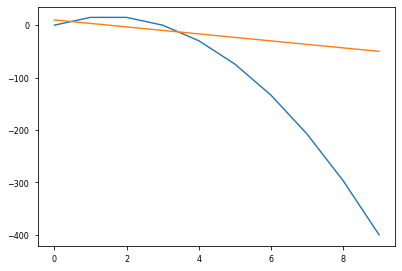

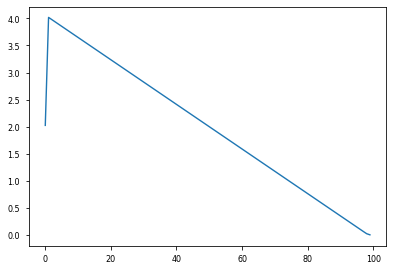

In [61]:

plot(sol)
figure()
plot(grad)

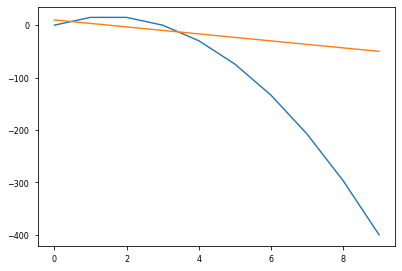

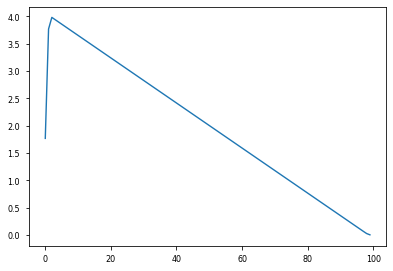

In [63]:

plot(sol)
figure()
plot(grad)

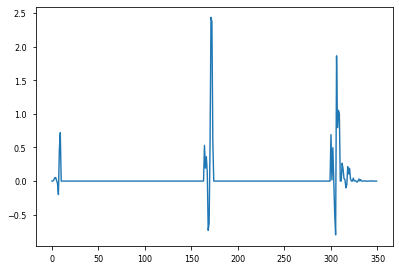

In [63]:
plot(grad.values)

In [54]:
tf.gather(yDrv, 8)

<tf.Tensor: shape=(), dtype=float64, numpy=-3.0>

In [55]:
import tfdiffeq as tfd
tfd.solvers.FixedGridODESolver?

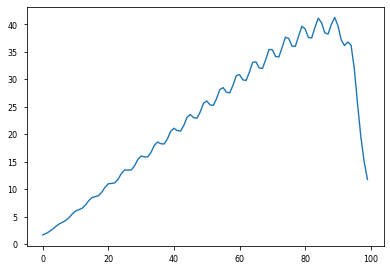

In [91]:
def lor(center):
    return 1/(0.4+ (x-center)**2 )

y = linspace(0,10,20)
x = arange(20)
msk = lor(5)
#M = np.diag(  )
plot([y.dot(lor(val)) for val in linspace(0,20,100) ])

In [93]:
odeint

In [41]:
tf.concat([tf.range(0,5,1.5), [0]], axis=0)

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([0. , 1.5, 3. , 4.5, 0. ], dtype=float32)>

In [10]:
import qutip as q

In [24]:

q.sigmax()
K1, K2 = q.basis(2,0), q.basis(2,1)

In [12]:
q.sigmay()

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0.+0.j 0.-1.j]
 [0.+1.j 0.+0.j]]

In [23]:
a=q.destroy(2)
1j*(a.dag()-a)

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0.+0.j 0.-1.j]
 [0.+1.j 0.+0.j]]

In [34]:
a = K1*K2.dag()# + K2*K1.dag()
sx = a + a.dag()
sy = 1j*(a.dag()-a)
sx,sy

(Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
 Qobj data =
 [[0. 1.]
  [1. 0.]],
 Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
 Qobj data =
 [[0.+0.j 0.-1.j]
  [0.+1.j 0.+0.j]])

In [26]:
a.dag()

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = False
Qobj data =
[[0. 0.]
 [1. 0.]]

In [30]:
a

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = False
Qobj data =
[[0. 1.]
 [0. 0.]]

# TFP Odeint

In [1]:
%load_ext autoreload
%autoreload 2
import tensorflow as tf
from spylind.tf_misc import tf_interpolator2
tf.keras.backend.set_floatx('float64') # Presumably can get more speed, especially on a GPU, 
import tensorflow_probability as tfp

import numpy as np
import pylab as pl
import matplotlib.pyplot as plt

In [2]:



class Interpolator(tf.keras.Model):
    
    def __init__(self, xOrig, yOrig): #pars are parameters to the ode
        super().__init__()
        self.xOrig = tf.constant(tf.convert_to_tensor(xOrig, dtype=tf.float64))
        self.yOrig = tf.Variable(tf.convert_to_tensor(yOrig, dtype=tf.float64))

        self.N = xOrig.shape[0]
        self.dx = xOrig[1]-xOrig[0]
        self.x0 = xOrig[0]
        self.xMax = xOrig[-1]
        self.zero = tf.constant(0, dtype=tf.float64)
        self.mask = tf.concat([tf.constant([0.5,0.5], dtype='float64'), tf.zeros(xOrig.shape[0]-2, dtype='float64') ], axis=0)
    
    def call(self, x):
        #pdb.set_trace()
        #ind = tf.math.floormod((x-x0), dx)
        if x>=self.xMax or x<self.x0:
            return self.zero#tf.constant(0., dtype=tf.float64);
        else:
            ind = tf.math.floordiv(x-self.x0, self.dx)
            remainder = x- ind*self.dx
            ind = tf.cast(ind, tf.int64)
            res = tf.roll(self.mask, ind, axis=0)*self.yOrig
            return tf.reduce_sum(res)
        return f
class Interpolator2(tf.keras.Model):
    
    def __init__(self, xOrig): #pars are parameters to the ode
        super().__init__()
        self.xOrig = tf.constant(tf.convert_to_tensor(xOrig, dtype=tf.float64))
        self.N = xOrig.shape[0]
        self.dx = xOrig[1]-xOrig[0]
        self.x0 = xOrig[0]
        self.xMax = xOrig[-1]
        self.zero = tf.constant(0, dtype=tf.float64)
        self.mask = tf.concat([tf.constant([0.5,0.5], dtype='float64'), tf.zeros(xOrig.shape[0]-2, dtype='float64') ], axis=0)
    
    def call(self, x, yOrig):
        #pdb.set_trace()
        #ind = tf.math.floormod((x-x0), dx)
        if x>=self.xMax or x<self.x0:
            return self.zero#tf.constant(0., dtype=tf.float64);
        else:
            ind = tf.math.floordiv(x-self.x0, self.dx)
            remainder = x- ind*self.dx
            ind = tf.cast(ind, tf.int64)
            res = tf.roll(self.mask, ind, axis=0)*yOrig
            return tf.reduce_sum(res)
        return f

    
def interpolate(x, xOrig, yOrig):
    dx = xOrig[1]-xOrig[0]
    x0 = xOrig[0]
    xMax = xOrig[-1]
    zero = tf.constant(0, dtype=tf.float64)
    mask = tf.concat([tf.constant([0.5,0.5], dtype='float64'), tf.zeros(xOrig.shape[0]-2, dtype='float64') ], axis=0)
    if x>=xMax or x<x0:
        return zero#tf.constant(0., dtype=tf.float64);
    else:
        ind = tf.math.floordiv(x- x0, dx)
        remainder = x- ind*dx
        ind = tf.cast(ind, tf.int64)
        res = tf.roll(mask, ind, axis=0)*yOrig
        return tf.reduce_sum(res)
    return f

t_init =0;#
#, t0, t1 = 0., 0.5, 1.
tSteps = tf.linspace(0,5,200) #= [t0, t1]
y_init = tf.constant([1., 3.], dtype=tf.float64)
#A = tf.constant([[-1., -2.], [-3., -4.]], dtype=tf.float64)

#@tf.function
#def ode_fn(t, y):
#  return tf.linalg.matvec(A, y)
tDrv = tf.convert_to_tensor(np.linspace(0,5.1, 100), dtype='float64')
yDrv = -tf.ones(tDrv.shape[0], dtype='float64')
#f = tf_interpolator2(tDrv, yDrv)
f = Interpolator(tDrv, yDrv)
@tf.function
def ode_fn(t, z):
    y, vy= z[0], z[1]
    d_y = vy
    d_vy =  f(t)
    return tf.stack([d_y, d_vy])

with tf.GradientTape(watch_accessed_variables=False) as tape:
    tape.watch(yDrv)

    results = tfp.math.ode.DormandPrince().solve(ode_fn, t_init, y_init, solution_times=tSteps)
    y0 = results.states[0]  # == dot(matrix_exp(A * t0), y_init)
    y1 = results.states[1]  # == dot(matrix_exp(A * t1), y_init)
#tape.gradient(results.states[-1,0], yDrv)

In [3]:
import sympy as sm
from spylind.tf_misc import InterpolatorMask
ES = sm.symbols("E")

yDrv = tf.Variable(yDrv, name='var', dtype='float64')
class Lambda(tf.keras.Model):
    
    def __init__(self, tDrv,yDrv): #pars are parameters to the ode
        super().__init__()
        
        #self.f = tf.function(tf_interpolator2(tDrv, yDrv), experimental_compile=False)
        self.f = InterpolatorMask(tDrv, yDrv)
        self.tDrv = tDrv;
        #self.yDrv = yDrv
        #self.yDrv = tf.Variable(yDrv)
    @tf.function
    def call(self, t, z, **kwargs):
        #yDrv = kwargs[str(ES)][0]
        #tf.print(t, z)
        y, vy= z[0], z[1]
        d_y = vy
        #d_vy = interpolate(t, self.tDrv, yDrv)
        d_vy = self.f(t) 
        
        return tf.stack([d_y, d_vy])
    
ode_fn = Lambda(tDrv, yDrv)

@tf.function(experimental_compile=True)
def run(tSteps, yDrv):
    with tf.GradientTape(watch_accessed_variables=False) as tape:
        #ode_fn.f.yOrig.assign(yDrv)
        ode_fn.f.set_y(yDrv)

        #tape.watch(yDrv)
        tape.watch(y_init)
        #tape.watch(var)
        #ode_fn.yDrv.assign(yDrv)
        tape.watch(ode_fn.f.yOrig)
        #ode_fn.f.yOrig.assign(yDrv)
        #results = tfp.math.ode.DormandPrince().solve(ode_fn, t_init, y_init, solution_times=tSteps, constants={'yDrv': yDrv})
        #results = tfp.math.ode.DormandPrince().solve(ode_fn, t_init, y_init, solution_times=tSteps)#, constants={str(ES):[yDrv]} )
        results = tfp.math.ode.FixedStep(step_size=1e-4).solve(ode_fn, t_init, y_init, solution_times=tSteps)
        y0 = results.states[:,0]  # == dot(matrix_exp(A * t0), y_init)
        y1 = results.states[:,1]  # == dot(matrix_exp(A * t1), y_init)
        L = y0[-2]
        #L=
    return results, tape.gradient(L, ode_fn.f.yOrig)

In [14]:
tf.range(0,1.05,0.1)

<tf.Tensor: shape=(11,), dtype=float32, numpy=
array([0.        , 0.1       , 0.2       , 0.3       , 0.4       ,
       0.5       , 0.6       , 0.70000005, 0.8000001 , 0.9000001 ,
       1.0000001 ], dtype=float32)>

In [4]:
ode_fn.f.set_y(yDrv*0.1)
#tSteps = np.linspace(0,1, 20)
tSteps = tfp.math.ode.ChosenBySolver(1.0)
res=tfp.math.ode.FixedStep(step_size=1e-2).solve(ode_fn, t_init, y_init, solution_times= tSteps)

In [6]:
res=tfp.math.ode.FixedStep(step_size=1e-2).solve(ode_fn, t_init, y_init, solution_times= tSteps)

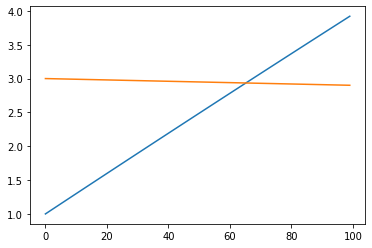

In [5]:
plt.plot(res.states[:-1])

In [9]:
#yDrvV = tf.Variable(yDrv)
#tDrvV = tf.Variable(tDrv)
tSteps = np.linspace(0,5,200) #= [t0, t1]
tSteps2 = np.linspace(0,5,20) #= [t0, t1]


drv= np.linspace(0,1, yDrv.shape[0])
%time res1a= run(tSteps, drv[::-1])
#var.assign(5)
#%time res2a= run(tSteps2, 10*drv)

#var.assign(3)
%time res3a= run(tSteps, 100*-drv)
#%time res3= run(1*yDrv)

CPU times: user 128 ms, sys: 4 ms, total: 132 ms
Wall time: 139 ms
CPU times: user 126 ms, sys: 0 ns, total: 126 ms
Wall time: 126 ms


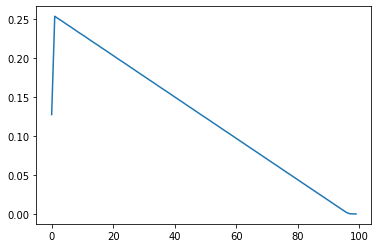

In [10]:
plt.plot(res1a[1])

In [18]:
#yDrvV = tf.Variable(yDrv)
#tDrvV = tf.Variable(tDrv)
tSteps = np.linspace(0,5,200) #= [t0, t1]
tSteps2 = np.linspace(0,5,20) #= [t0, t1]


drv= np.linspace(0,1, yDrv.shape[0])
%time res1= run(tSteps, drv[::-1])
#var.assign(5)
%time res2= run(tSteps2, 10*drv)

#var.assign(3)
%time res3= run(tSteps, 100*-drv)
#%time res3= run(1*yDrv)

CPU times: user 5.27 s, sys: 31 ms, total: 5.3 s
Wall time: 5.43 s
CPU times: user 5.24 s, sys: 15 ms, total: 5.25 s
Wall time: 5.36 s
CPU times: user 7 ms, sys: 0 ns, total: 7 ms
Wall time: 6.58 ms


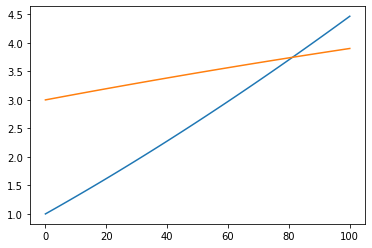

In [132]:
plt.plot(res1a[0].states)

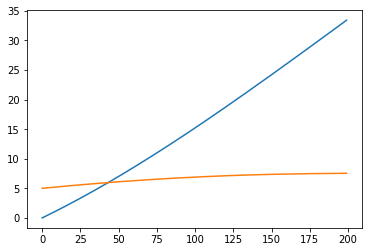

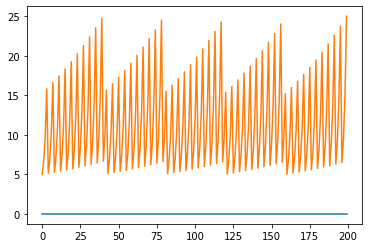

In [19]:
plt.plot(res1[0].states)
plt.figure()
plt.plot(res1a[0].states)

In [133]:
plt.plot(res1[1])

NameError: name 'res1' is not defined

In [35]:
dp.ODE_FN_EVALS_PER_STEP

6

In [121]:
%time res1= run(tDrvV, yDrvV)
%time res1= run(tDrvV, yDrvV)

CPU times: user 1.42 s, sys: 79 ms, total: 1.49 s
Wall time: 1.2 s
CPU times: user 1.45 s, sys: 75 ms, total: 1.53 s
Wall time: 1.28 s


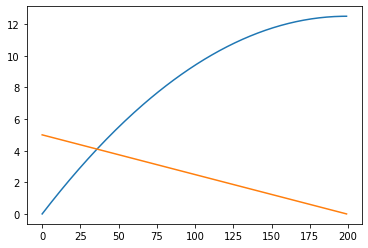

In [152]:
plt.plot(res1[0].states)#

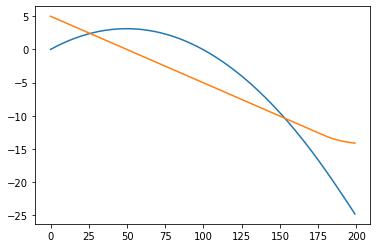

In [150]:
plt.plot(res1[0].states)#

In [78]:
yDrvV = tf.Variable(yDrv)
ode_fn = Lambda(tDrv, yDrvV)
#yDrvV.assigna
ode_fn2 = Lambda(tDrv, 2*yDrv)
ode_fn3 = Lambda(tDrv, 3*yDrv)


%time res1= run(yDrv, ode_fn)
ode_fn.f.yOrig.assign_add(tf.ones(100, dtype='float64'))
%time res2= run(yDrv, ode_fn)
ode_fn.f.yOrig.assign_add(tf.ones(100, dtype='float64'))
%time res3= run(yDrv, ode_fn)

CPU times: user 1.04 s, sys: 3 ms, total: 1.04 s
Wall time: 1.04 s
CPU times: user 32 ms, sys: 1 ms, total: 33 ms
Wall time: 30.1 ms
CPU times: user 39 ms, sys: 1 ms, total: 40 ms
Wall time: 57.6 ms


In [15]:
res1[1]

<tf.Tensor: shape=(2,), dtype=float64, numpy=array([1.        , 5.00000006])>

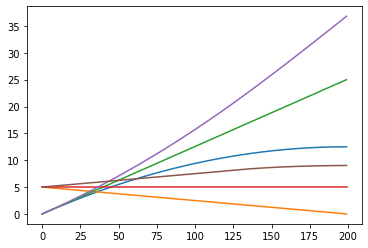

In [74]:
plt.plot(res1.states)
plt.plot(res2.states)
plt.plot(res3.states)

In [32]:
tf.GradientTape(watch_accessed_variables=False)

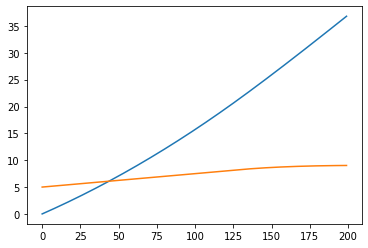

In [27]:
plt.plot(results.states.numpy())